In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

c_in = 1/1000
z = 1
alpha = 0.5
T = 298
E_eq = 0.0
E = np.arange(-0.3,0.3,0.05)
n = 2

## reference C*_oxidation and C*_reduction
Co = 1
Cr = 1

a_v = 4e10
L = 10e-6
x = np.arange(0, L+0.5e-6, 0.5e-6)
i_0 = 2e-4
F = 96485
D = 0.77e-5
RT = 0.08206*T

def beta(i):
    return alpha*z*F/(8.314*298)*(E[i]-E_eq)

## reaction, called by c_cl
def y(i):
    return (a_v*i_0/(n*F*D) * np.exp(alpha*z*F/(8.314*298)*(E[i]-E_eq)))

## concentration with rxn plugged in
def c_cl(i):
    g = np.sqrt(y(i))
    b = beta(i)
    ret = []
    for z in x:
        a = 1.1*np.exp(-2*b) + ((c_in*RT-(1.1*np.exp(-2*b)))/(np.exp(-2*L*g)+1))*(np.exp(g*(z-2*L))+np.exp(-g*z))
        ret = np.append(ret,a)
    return ret
    
def current(i):
    g = np.sqrt(y(i))
    b = beta(i)
    ret = []
    z = 0;
    dcdx = g*((c_in*RT-(1.1*np.exp(-2*b)))/(np.exp(-2*L*g)+1))*(np.exp(g*(z-2*L))-np.exp(-g*z))
    ## flux in here = 2*j_e from Yoon ?
    j_in = -D*dcdx
    
    return n*F*j_in



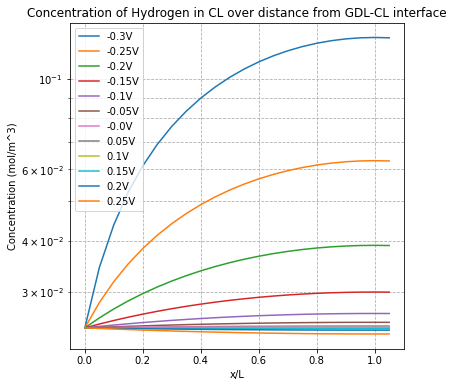

In [25]:
from scipy.integrate import trapz, simps

plt.figure(figsize=(6,6))
for i in range(len(E)):
    plt.plot(x/L, c_cl(i), label=(str(round(E[i],2)) + 'V'))

plt.title('Concentration of Hydrogen in CL over distance from GDL-CL interface')
plt.ylabel('Concentration (mol/m^3)')
plt.xlabel('x/L')
plt.yscale('log')
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

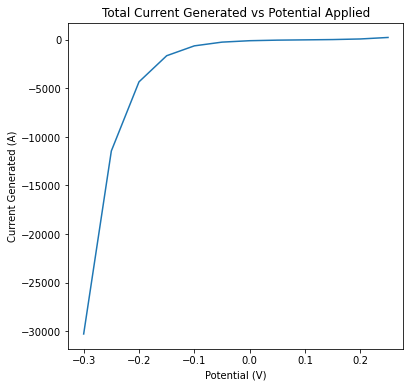

In [26]:
from scipy.integrate import trapz, simps

plt.figure(figsize=(6,6))
I = []
for i in range(len(E)):
    ## area = trapz(c_cl(i), dx=0.5e-5)
    I = np.append(I,current(i))
    
plt.plot(E, I)
plt.title('Total Current Generated vs Potential Applied')
plt.ylabel('Current Generated (A)')
plt.xlabel('Potential (V)')
##plt.yscale('log')
##plt.grid(True,which="both", linestyle='--')
plt.show()